In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [10]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

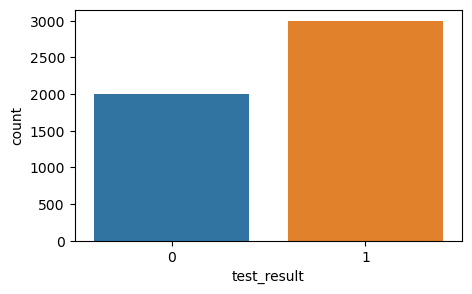

In [5]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['test_result'],data=df)
plt.show()

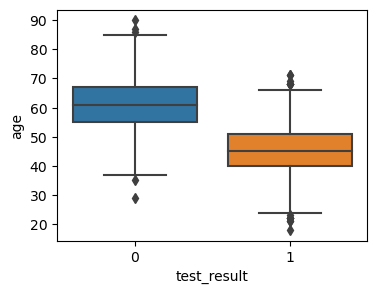

In [6]:
plt.figure(figsize=(4,3))
sns.boxplot(x='test_result',y='age',data=df) # people who do not pass the test tend to be older
plt.show()

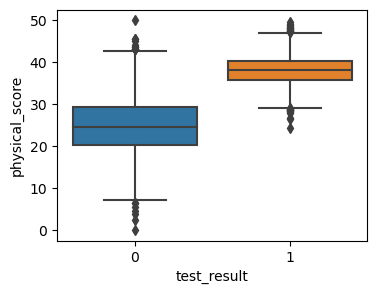

In [7]:
plt.figure(figsize=(4,3))
sns.boxplot(x='test_result',y='physical_score',data=df) # people who pass the test tend to have great physical score
plt.show()

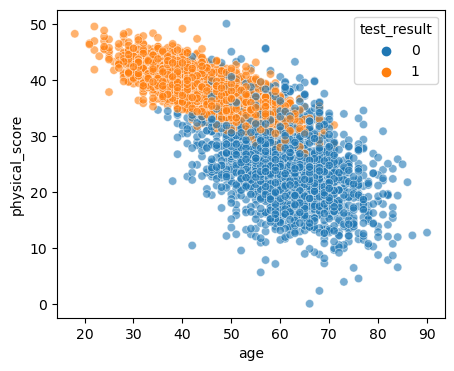

In [12]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.6)
plt.show()

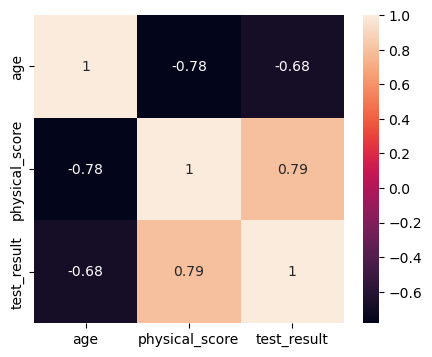

In [14]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [17]:
x=df.drop(['test_result'],axis=1)
y=df['test_result']

In [18]:
# do the train test split before scaling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=101)

In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [37]:
log_model.coef_ 

# As the age increases the odds of the 'one class' for the test result would  decreases

array([[-0.94953524,  3.45991194]])

In [34]:
# log_model.predict(x_test)  顯示預測結果(0 or 1)
# log_model.predict_proba(x_test)  顯示機率

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [39]:
y_pred=log_model.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.93

In [42]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

C:\Users\maztl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


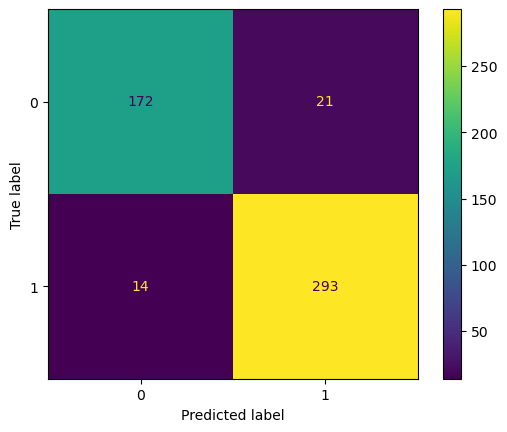

In [48]:
plot_confusion_matrix(log_model,x_test,y_test)
plt.show()

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [50]:
from sklearn.metrics import precision_score,recall_score

In [51]:
precision_score(y_test,y_pred)

0.9331210191082803

In [52]:
recall_score(y_test,y_pred)

0.9543973941368078

In [57]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\maztl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


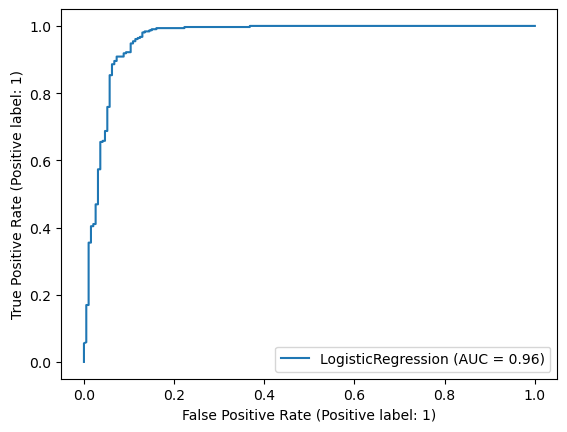

In [58]:
plot_roc_curve(log_model,x_test,y_test)
plt.show()